In [1]:
#!pip install psycopg2


In [2]:
import psycopg2
import pandas as pd
import csv

### verify the conexion
try:
    # Connect to the database
    conn = psycopg2.connect(
        host="pg.ujueta.com",
        port="5432",
        user="consultoria",
        password="LmKTXJBXya!14]f9!2k]",
        database="postgres",
    )
except psycopg2.Error as e:
    print("Error connecting to the database:")
    print(e)
else:
    print("Connection established successfully")

Connection established successfully


In [3]:

### ventas diario apiladas
def export_forecast_to_csv():
    try:
        # connect to the database
        conn = psycopg2.connect(
            host="pg.ujueta.com",
            port="5432",
            user="consultoria",
            password="LmKTXJBXya!14]f9!2k]",
            database="postgres",
        )

        # create cursor
        with conn.cursor() as cur:

            # ececute a sql query

            cur.execute("SELECT * FROM forecast.ventas_diario")

            # fetch the results
            results = cur.fetchall()

            # open a file in the downloads folder

            with open(
                "/home/usuario/Escritorio/Consultorias_Empresariales/Ujueta/Datos/outputs.csv",
                "w",
                newline="",
            ) as f:
                # create a csv writer
                writer = csv.writer(f)

                # write the column names
                writer.writerow([col[0] for col in cur.description])

                # write the query results
                writer.writerows(results)
    except Exception as e:
        print(f"An error ocurred: {e}")
    finally:
        # close the cursor and connection
        if conn:
            conn.close()


# Call the function to export data to csv
export_forecast_to_csv()


In [48]:
### manipulate data

import pandas as pd

# carga de datas
data = pd.read_csv(
    "/home/usuario/Escritorio/Consultorias_Empresariales/Ujueta/Datos/outputs.csv"
)
# convertir en dataframe
df = pd.DataFrame(data)
df.head()

,docdate,codigo_articulo,cantidad
0,2022-01-03,AUACALR4,1
1,2022-01-03,AUACCH1,5
2,2022-01-03,AUACPB400,1
3,2022-01-03,AUACRIM4F,5
4,2022-01-03,AUACSH1000,3


In [49]:
df.shape

(87675, 3)

In [50]:
df['docdate'] = pd.to_datetime(df['docdate'], errors ='coerce')

(df.groupby([pd.Grouper(key='docdate', freq='MS'), 'codigo_articulo'])['cantidad']
 .sum()
 .reset_index()    
)

,docdate,codigo_articulo,cantidad
0,2022-01-01,AUAC265,1
1,2022-01-01,AUAC3-4-1,70
2,2022-01-01,AUACAC24NE,2
3,2022-01-01,AUACAE15,1
4,2022-01-01,AUACAE20,138
...,...,...,...
9774,2024-11-01,SOSWSWW2060N,20
9775,2024-11-01,SOSWSWW2550,2
9776,2024-11-01,SOSWSWW2760,2
9777,2024-11-01,SOSWT1-111,7


In [51]:
# List of SKUs to filter
selected_skus = [
                   'AUAC265', 'AUAC3-4-1', 'AUAC4010', 'AUACAC24NE600', 'AUACAC24NE', 'AUACAE15', 'AUACAE25', 'AUACAF24Li', 'AUACAF31C',
                   'AUACAH45', 'AUACAL3900U', 'AUACALH2', 'AUACALK4', 'AUACALS4', 'AUACAN4275', 'AUACAP40', 'AUACAR10SC901', 'AUACAR10SH', 'AUACAR200',
                    'AUACAR380', 'AUACAT42', 'AUACAT63', 'AUACAVANTI6000Z', 'AUACBD1100','AUACBD1522', 'AUACBD850', 'AUACBL05', 'AUACBOOM02',
                   'AUACBOOM04F', 'AUACBOOM06T', 'AUACCH1', 'AUACCRAB02','AUACCRAB03', 'AUACDG1224', 'AUACEG250', 'AUACEG500', 'AUACEG501', 'AUACEL12',
                    'AUACFC350', 'AUACFC351', 'AUACFENIX600', 'AUACFENIX601', 'AUACFEX10', 'AUACFL85265', 'AUACFS05', 'AUACFX1000', 'AUACGC02',
                    'AUACHR42', 'AUACHULK1500', 'AUACHULK400S', 'AUACHULK450', 'AUACHULK750','AUACHULK950', 'AUACIN624', 'AUACKCP200C', 'AUACKCP201R',
                     'AUACKCP250R', 'AUACKCP251C', 'AUACKCP300C', 'AUACKCP301R', 'AUACKCP350C', 'AUACKCP351R', 'AUACKCP375C', 'AUACKCP376R', 'AUACKCP400C',
                     'AUACKCP401R', 'AUACKCP450R', 'AUACKCP451C', 'AUACKCP490C', 'AUACKCP491R', 'AUACKCP501R', 'AUACKCP551R', 'AUACKCP575R', 'AUACKCP801R',
                     'AUACKCP850R', 'AUACKCP875R', 'AUACKCP900R', 'AUACKCP950R', 'AUACKCP975R', 'AUACKH100K', 'AUACKH120K', 'AUACKH140K', 'AUACKH160K', 'AUACKH55K',
                     'AUACKH60K', 'AUACKH70K', 'AUACKH80K', 'AUACKSH20', 'AUACLD500', 'AUACMN20', 'AUACMTD224', 'AUACMTD624', 'AUACOP3090W', 'AUACOWL504',
                     'AUACOWL608', 'AUACRC4SC', 'AUACRCBLT3', 'AUACRIM4Z', 'AUACRP120','AUACRT2415U', 'AUACRT3FX', 'AUACRT4SC', 'AUACSB4', 'AUACSB9',
                     'AUACSC1800', 'AUACSC901', 'AUACSLB220', 'AUACSPRING35L', 'AUACSPRING35R', 'AUACSPRING45L', 'AUACSPRING45R', 'AUACSPRING50L', 'AUACSPRING50R',
                     'AUACSPRING55L', 'AUACSPRING55R', 'AUACSPRING60L', 'AUACSPRING60R', 'AUACSPRING70L', 'AUACSPRING70R','AUACSPRING80L', 'AUACSPRING80R',
                     'AUACV515', 'AUACVIPER100', 'AUELCR4301', 'AUELEE16', 'AUELEP100240', 'AUELMC12', 'AUELMC3', 'AUELME611', 'AUELME624DC', 'AUELME811',
                     'AUELPA42', 'AUELSL3000L', 'AUELSL5000', 'AUELSL5500L', 'HEELAG114', 'HEELAG1420', 'HEELAG181', 'HEELAG230', 'HEELAIRKIT20', 'HEELBM3514',
                     'HEELBM5016', 'HEELBV04', 'HEELBV05', 'HEELBV06', 'HEELCA1012D','HEELCA2542D', 'HEELCA5035', 'HEELCA6256', 'HEELCINPA30410', 'HEELCINPU30410',
                     'HEELCS1425', 'HEELCS1427', 'HEELDH1506', 'HEELDH164515', 'HEELDH2810', 'HEELDH4515', 'HEELDH7531', 'HEELEBA111630', 'HEELEBA11850',
                     'HEELEBA1230', 'HEELEBA1250', 'HEELEBA130', 'HEELEBA131630', 'HEELEBA13850','HEELEBA150', 'HEELEBA3430', 'HEELEBA3450', 'HEELEBA5830',
                     'HEELEBA5850', 'HEELEBA7830', 'HEELEBA7850', 'HEELEBA91630', 'HEELEPBA634C', 'HEELEPBA634L', 'HEELJS750', 'HEELMS1018', 'HEELMS1021S',
                     'HEELMT180KIT','HEELPS350', 'HEELPW2482', 'HEELRD1390', 'HEELRM2604', 'HEELRM3209','HEELRM4210', 'HEELRT1512', 'HEELSP500', 'HEELTA1100',
                     'HEELTA1500', 'HEELTA375', 'HEELTA550', 'HEELTA750', 'HEELTS255','HEELXB0220', 'HEELXB0420', 'HEELXB0520', 'HEELXBEA20', 'HEELXBTP20','HEELXCB20',
                     'HEELXID19', 'HEELXIW20', 'HEFUBFCD12', 'HEFUBFCD21','HEFUCBFCD12', 'HEFUCBFCD21', 'HEFUFCS2511', 'HEFUFDH1320', 'HEFUFHG18',
                     'HEFUFPS25', 'HEFUFRM13030', 'HEFUFRM7024', 'MADUDG121-A', 'MADUDG123-A', 'MADUDG23I', 'MADUDG301-A', 'MADUDG401I', 'MADUDG701',
                     'MAEL2G100', 'MAEL2G10I', 'MAEL2G13', 'MAEL2G25', 'MAEL2G40', 'MAEL2G65', 'MAEL2G80', 'MAEL2G950', 'MAELGPW2515', 'SOELAT2610254M',
                     'SOELAT2635504M', 'SOELCSVM500IP', 'SOELCSVM500OP','SOELCSVM750', 'SOELCSVM760', 'SOELCSVM820', 'SOELCSVM830', 'SOELKITSI7160XP',
                     'SOELPES6300', 'SOELPMS6505', 'SOELRAFC208', 'SOELRAFC209', 'SOELREPSI8250MG-R11', 'SOELREPSI8250MG-R12', 'SOELRSF0810A', 'SOELRSF0810B',
                     'SOELRSF1012', 'SOELRSS0608A', 'SOELRSS0608B', 'SOELRSS0910A', 'SOELRSS0910B', 'SOELRSS1012B', 'SOELSI6160MDV', 'SOELSI6200MDV',
                     'SOELSI7160XP', 'SOELSI7175XP', 'SOELSI7200XP', 'SOELSI8225AL', 'SOELSI8225XP', 'SOELSI8300MG', 'SOELSI9210DT', 'SOELSI9220MP',
                     'SOELSI9250DV', 'SOELSI9300DV', 'SOELSI9500MP', 'SOELSIC40DV', 'SOELSIC45DVP', 'SOFUFW121', 'SOFUFW131M', 'SOFUFW161M', 'SOFUFW185',
                     'SOFUFW205CEL', 'SOFUFW255P', 'SOFUFW257', 'SOFUFW50', 'SOFUFW81', 'SOFUFW83', 'SOFUFWA4011', 'SOFUFWA4012', 'SOFUFWA4013',
                     'SOFUFWA4014', 'SOSWC1-620', 'SOSWC1-669', 'SOSWC1-921', 'SOSWC1-931', 'SOSWC1-941', 'SOSWC6-603', 'SOSWG1-110', 'SOSWG1-111',
                     'SOSWG1-112', 'SOSWG1-114', 'SOSWG2-216', 'SOSWG2-217', 'SOSWG3-311', 'SOSWG3-312', 'SOSWG3-313', 'SOSWG3-314', 'SOSWG3-316', 'SOSWG3-COOL',
                     'SOSWM1-113', 'SOSWM1-117', 'SOSWM1-122', 'SOSWM1-125','SOSWM2-210', 'SOSWM2-211', 'SOSWM2-212','SOSWM2-214', 'SOSWM2-215', 'SOSWM2-217',
                     'SOSWM2-218', 'SOSWM2-229', 'SOSWM2-235', 'SOSWM2-236', 'SOSWM2-237','SOSWM2-238', 'SOSWM2-245', 'SOSWM2-246', 'SOSWM2-249', 'SOSWM2-251',
                     'SOSWM2-252', 'SOSWM2-253', 'SOSWM2-254', 'SOSWM2-257', 'SOSWM2-265', 'SOSWM2-272', 'SOSWM2-274', 'SOSWM2-311', 'SOSWM2-312',
                     'SOSWM2-320', 'SOSWM2-321', 'SOSWM2-324', 'SOSWM2-325', 'SOSWM2-328', 'SOSWM3-215', 'SOSWM3-225', 'SOSWM3-316', 'SOSWM3-325',
                     'SOSWM3-326', 'SOSWM3-327', 'SOSWP1-330','SOSWP1-340', 'SOSWP1-440', 'SOSWP2-409', 'SOSWP2-410', 'SOSWP2-411', 'SOSWP2-412',
                     'SOSWP2-413', 'SOSWP2-414', 'SOSWP2-417', 'SOSWP2-418', 'SOSWP2-420', 'SOSWP2-421', 'SOSWP2-424', 'SOSWP2-425', 'SOSWP2-427',
                     'SOSWP2-510', 'SOSWP2-511', 'SOSWP2-512', 'SOSWP2-515', 'SOSWP2-518', 'SOSWPMSW02', 'SOSWREPM1-122E', 'SOSWSWA2040N', 'SOSWSWA2650',
                     'SOSWSWA2850', 'SOSWSWA3250', 'SOSWSWC1000', 'SOSWSWC440N', 'SOSWSWC690', 'SOSWSWP3060', 'SOSWSWT2033', 'SOSWSWT2035', 'SOSWSWT2045',
                     'SOSWSWT3545A', 'SOSWSWW2060N', 'SOSWSWW2550', 'SOSWSWW2760', 'SOSWSWW3552', 'SOSWSWW4070MV', 'SOSWSWW5070MV', 'SOSWT1-111', 'SOSWT1-112', 'SOSWT1-115'
]

# Filter the dataset
filtered_df = df[df['codigo_articulo'].isin(selected_skus)]

In [52]:
print(filtered_df)

         docdate codigo_articulo  cantidad
1     2022-01-03         AUACCH1         5
5     2022-01-03      AUELCR4301         1
7     2022-01-03         AUELMC3         1
9     2022-01-03       HEELAG114        14
12    2022-01-03       HEELAG181         2
...          ...             ...       ...
87670 2024-11-19     SOSWSWT2035         1
87671 2024-11-19    SOSWSWW2060N         5
87672 2024-11-19     SOSWSWW2760         1
87673 2024-11-19      SOSWT1-111         1
87674 2024-11-19      SOSWT1-115        -1

[49580 rows x 3 columns]


In [53]:
data_lowdda = filtered_df[filtered_df['docdate'] >= '2022-01-01']
data_lowdda

,docdate,codigo_articulo,cantidad
1,2022-01-03,AUACCH1,5
5,2022-01-03,AUELCR4301,1
7,2022-01-03,AUELMC3,1
9,2022-01-03,HEELAG114,14
12,2022-01-03,HEELAG181,2
...,...,...,...
87670,2024-11-19,SOSWSWT2035,1
87671,2024-11-19,SOSWSWW2060N,5
87672,2024-11-19,SOSWSWW2760,1
87673,2024-11-19,SOSWT1-111,1


In [54]:
# series con muy pocos valores para pasar por los modelos--> Buscar una forma de hacer pronosticos: sma u otros
low_cases = ['AUACAVANTI6000Z', 'AUACBOOM04F', 'AUACFS05', 'AUACHULK1500', 'AUACKCP900R', 'AUACKH160K',
            'AUACAC24NE600', 'AUACALK4', 'AUACBOOM02', 'AUACCRAB03', 'AUACHULK400S', 'AUACKCP501R',
            'AUACKCP801R', 'AUACKH60K', 'AUACKH80K', 'AUACKSH20', 'AUACMTD224', 'AUACRC4SC', 
             'AUACSPRING35L', 'AUACSPRING35R', 'AUACSPRING45L', 'AUACSPRING45R', 'AUACSPRING50L', 'AUACSPRING50R',
            'HEELEBA13850', 'MAEL2G80', 'SOELREPSI8250MG-R11', 'SOELREPSI8250MG-R12', 'SOELRSF1012', 'SOELRSS0608A',
            'SOFUFWA4011', 'SOSWG3-312', 'SOSWM1-113', 'SOSWM2-218', 'SOSWM2-272', 'SOSWM2-320',
            'SOSWM2-321', 'SOSWM2-324', 'SOSWM2-325', 'SOSWM2-328', 'SOSWP2-421', 'SOSWP2-424', 'SOSWSWW5070MV', 
            'HEELEBA11850', 'HEELEPBA634L', 'SOELRSS0910A', 'SOELRSS0910B', 'SOELRSS1012B', 'SOELSI9500MP',
            'SOELSIC45DVP', 'SOSWG3-316', 'SOSWG3-COOL', 'SOSWM1-125', 'SOSWM2-217', 'SOSWM2-249',
            'SOSWM2-253', 'SOSWM2-257', 'SOSWP1-340', 'SOSWP2-420', 'SOSWP2-425', 'SOSWP2-427',
            'SOSWREPM1-122E', 'SOSWSWT3545A', 'SOSWSWW3552', 'SOSWSWW4070MV', 'AUACRT4SC', 'AUACSPRING55L', 
             'HEELCS1427', 'HEELEBA150', 'HEELEBA3450', 'HEELEBA5850', 'HEELEBA7830', 'HEELEBA7850',
             'MADUDG123-A', 'SOELRSF0810A', 'SOELRSF0810B', 'SOELRSS0608B',
            'SOELSI8225XP', 'SOSWG3-314', 'SOSWM2-236', 'SOSWM2-238', 'SOSWM2-246', 'SOSWM2-274', 'SOSWSWT2033']      

In [55]:
low_dda = data_lowdda[~data_lowdda['codigo_articulo'].isin(low_cases)]
low_dda

,docdate,codigo_articulo,cantidad
1,2022-01-03,AUACCH1,5
5,2022-01-03,AUELCR4301,1
7,2022-01-03,AUELMC3,1
9,2022-01-03,HEELAG114,14
12,2022-01-03,HEELAG181,2
...,...,...,...
87670,2024-11-19,SOSWSWT2035,1
87671,2024-11-19,SOSWSWW2060N,5
87672,2024-11-19,SOSWSWW2760,1
87673,2024-11-19,SOSWT1-111,1


In [56]:
#========================================================================================================================================
# Ajuste de Datos para statsforecast
#========================================================================================================================================

#-- Dato de ejemplo para función

def data_sf(df, date = 'docdate', y = 'cantidad', unique_id = 'codigo_articulo'):
    df_m = df[[date, y, unique_id]]
    df_m.rename(columns={date : 'ds', y :'y', unique_id: 'unique_id'}, inplace=True)
  
    return df_m

df_m = data_sf(low_dda, date = 'docdate', y = 'cantidad', unique_id = 'codigo_articulo')
df_m
df_m.info()




<class 'pandas.core.frame.DataFrame'>
Index: 48644 entries, 1 to 87674
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ds         48644 non-null  datetime64[ns]
 1   y          48644 non-null  int64         
 2   unique_id  48644 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.5+ MB


In [57]:
print(df_m.head())  # Preview the data
print(df_m.isnull().sum())  # Check for missing values
#print(df_m.describe())  # Summarize data to detect anomalies


           ds   y   unique_id
1  2022-01-03   5     AUACCH1
5  2022-01-03   1  AUELCR4301
7  2022-01-03   1     AUELMC3
9  2022-01-03  14   HEELAG114
12 2022-01-03   2   HEELAG181
ds           0
y            0
unique_id    0
dtype: int64


In [58]:
#========================================================================================================================================
# Colección de modelos
#========================================================================================================================================
#========================================================================================================================================
# Colección de modelos
#========================================================================================================================================
from statsforecast import StatsForecast #- Para instanciar los  modelos
from statsforecast.models import Naive
from functools import partial
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mape, mase, mse, smape
from statsforecast.models import (
    #AutoARIMA,
    #AutoETS,
    #HoltWinters,
    ADIDA,
    CrostonClassic as Croston, 
    IMAPA,
    TSB,
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    Naive,
    SeasonalNaive,
    Theta,
    WindowAverage,
    #Holt,
    #CrostonOptimized,
)

#-- Parametros

# Número de meses en el futuro a pronosticar
horizon = 6
# Ventana estacional: es 12 porque tenemos datos mensuales
season_length = 12
# El número de meses que el modelo usará para hacer el forecast 
window_size = 6

# Lista de modelos a evaluar
models = [
    #AutoARIMA(season_length=season_length),
    #AutoETS(season_length=season_length),
    #HoltWinters(season_length=season_length),
    ADIDA(),
    Croston(),
    IMAPA(),
    TSB(alpha_d = 0.2, alpha_p = 0.2),
    HistoricAverage(),
    #DOT(season_length=season_length),
    Naive(),
    SeasonalNaive(season_length=season_length),
    Theta(),
    WindowAverage(window_size=12),  # Adjust `window_size` as needed
    #Holt(),
    #CrostonOptimized()
]

In [59]:
# StatsForecast.plot(df_m)

# Instanciando StatsForecast como sf
sf = StatsForecast( 
    models=models,
    freq='MS', #MS
    n_jobs=-1,
)


In [60]:
try:
    crossvaldation_df = sf.cross_validation(
        df=df_m,
        h=horizon,
        step_size=horizon,
        n_windows=2
    )
except ZeroDivisionError as e:
    print(f"Error: {e}")

/home/usuario/myenv/lib/python3.12/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


# Cross Validation


crossvaldation_df = sf.cross_validation(
    df=df_m,
    h=horizon,
    step_size=horizon,
    n_windows=3
)



In [61]:
def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['unique_id', 'ds', 'cutoff', 'y'], errors='ignore').columns.tolist()
    evals = []
    # Calculate loss for every unique_id and cutoff.    
    for cutoff in df['cutoff'].unique():
        eval_ = evaluate(df[df['cutoff'] == cutoff], metrics=[metric], models=models)
        evals.append(eval_)
    evals = pd.concat(evals)
    evals = evals.groupby('unique_id').mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

evaluation_df = evaluate_cross_validation(crossvaldation_df.reset_index(drop=False), smape)
evaluation_df.head(22)

,ADIDA,CrostonClassic,IMAPA,TSB,HistoricAverage,Naive,SeasonalNaive,Theta,WindowAverage,best_model
unique_id,,,,,,,,,,
AUAC265,0.518537,0.518578,0.518537,0.540937,0.508359,0.515673,0.404822,0.517688,0.520158,SeasonalNaive
AUAC3-4-1,0.609754,0.609754,0.609754,0.583114,0.632662,0.499260,0.549161,0.604408,0.607231,Naive
AUAC4010,0.499062,0.381823,0.499062,0.347508,0.458333,0.284848,0.469444,0.737348,0.279346,WindowAverage
AUACAC24NE,0.407151,0.409036,0.407151,0.430540,0.392574,0.510053,0.387500,0.403653,0.421419,SeasonalNaive
AUACAE15,0.401513,0.403501,0.401513,0.354846,0.468588,0.234848,0.340404,0.385583,0.432236,Naive
AUACAE25,0.289319,0.287772,0.289319,0.291181,0.301419,0.247421,0.298413,0.295005,0.279149,Naive
AUACAF24Li,0.471538,0.480247,0.471538,0.473602,0.498188,0.582109,0.563676,0.465657,0.468119,Theta
AUACAF31C,0.131508,0.132759,0.131508,0.060571,0.256585,0.027778,0.055556,0.122435,0.047778,Naive
AUACAH45,0.595407,0.595407,0.595407,0.639523,0.535358,0.427586,0.494776,0.595501,0.624789,Naive


In [62]:
#--- Selección del mejor modelo
fcst_df = sf.forecast(df=df_m, 
                      h=horizon, 
                      ## level=[90]
                     )
fcst_df.head(10)

/home/usuario/myenv/lib/python3.12/site-packages/statsforecast/core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,ADIDA,CrostonClassic,IMAPA,TSB,HistoricAverage,Naive,SeasonalNaive,Theta,WindowAverage
unique_id,,,,,,,,,,
AUAC265,2024-12-01,3.614694,3.61505,3.614694,3.206943,3.799228,1.0,1.0,3.594712,4.916667
AUAC265,2025-01-01,3.614694,3.61505,3.614694,3.206943,3.799228,1.0,1.0,3.592714,4.916667
AUAC265,2025-02-01,3.614694,3.61505,3.614694,3.206943,3.799228,1.0,10.0,3.590716,4.916667
AUAC265,2025-03-01,3.614694,3.61505,3.614694,3.206943,3.799228,1.0,2.0,3.588717,4.916667
AUAC265,2025-04-01,3.614694,3.61505,3.614694,3.206943,3.799228,1.0,27.0,3.586719,4.916667


/home/usuario/myenv/lib/python3.12/site-packages/statsforecast/core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


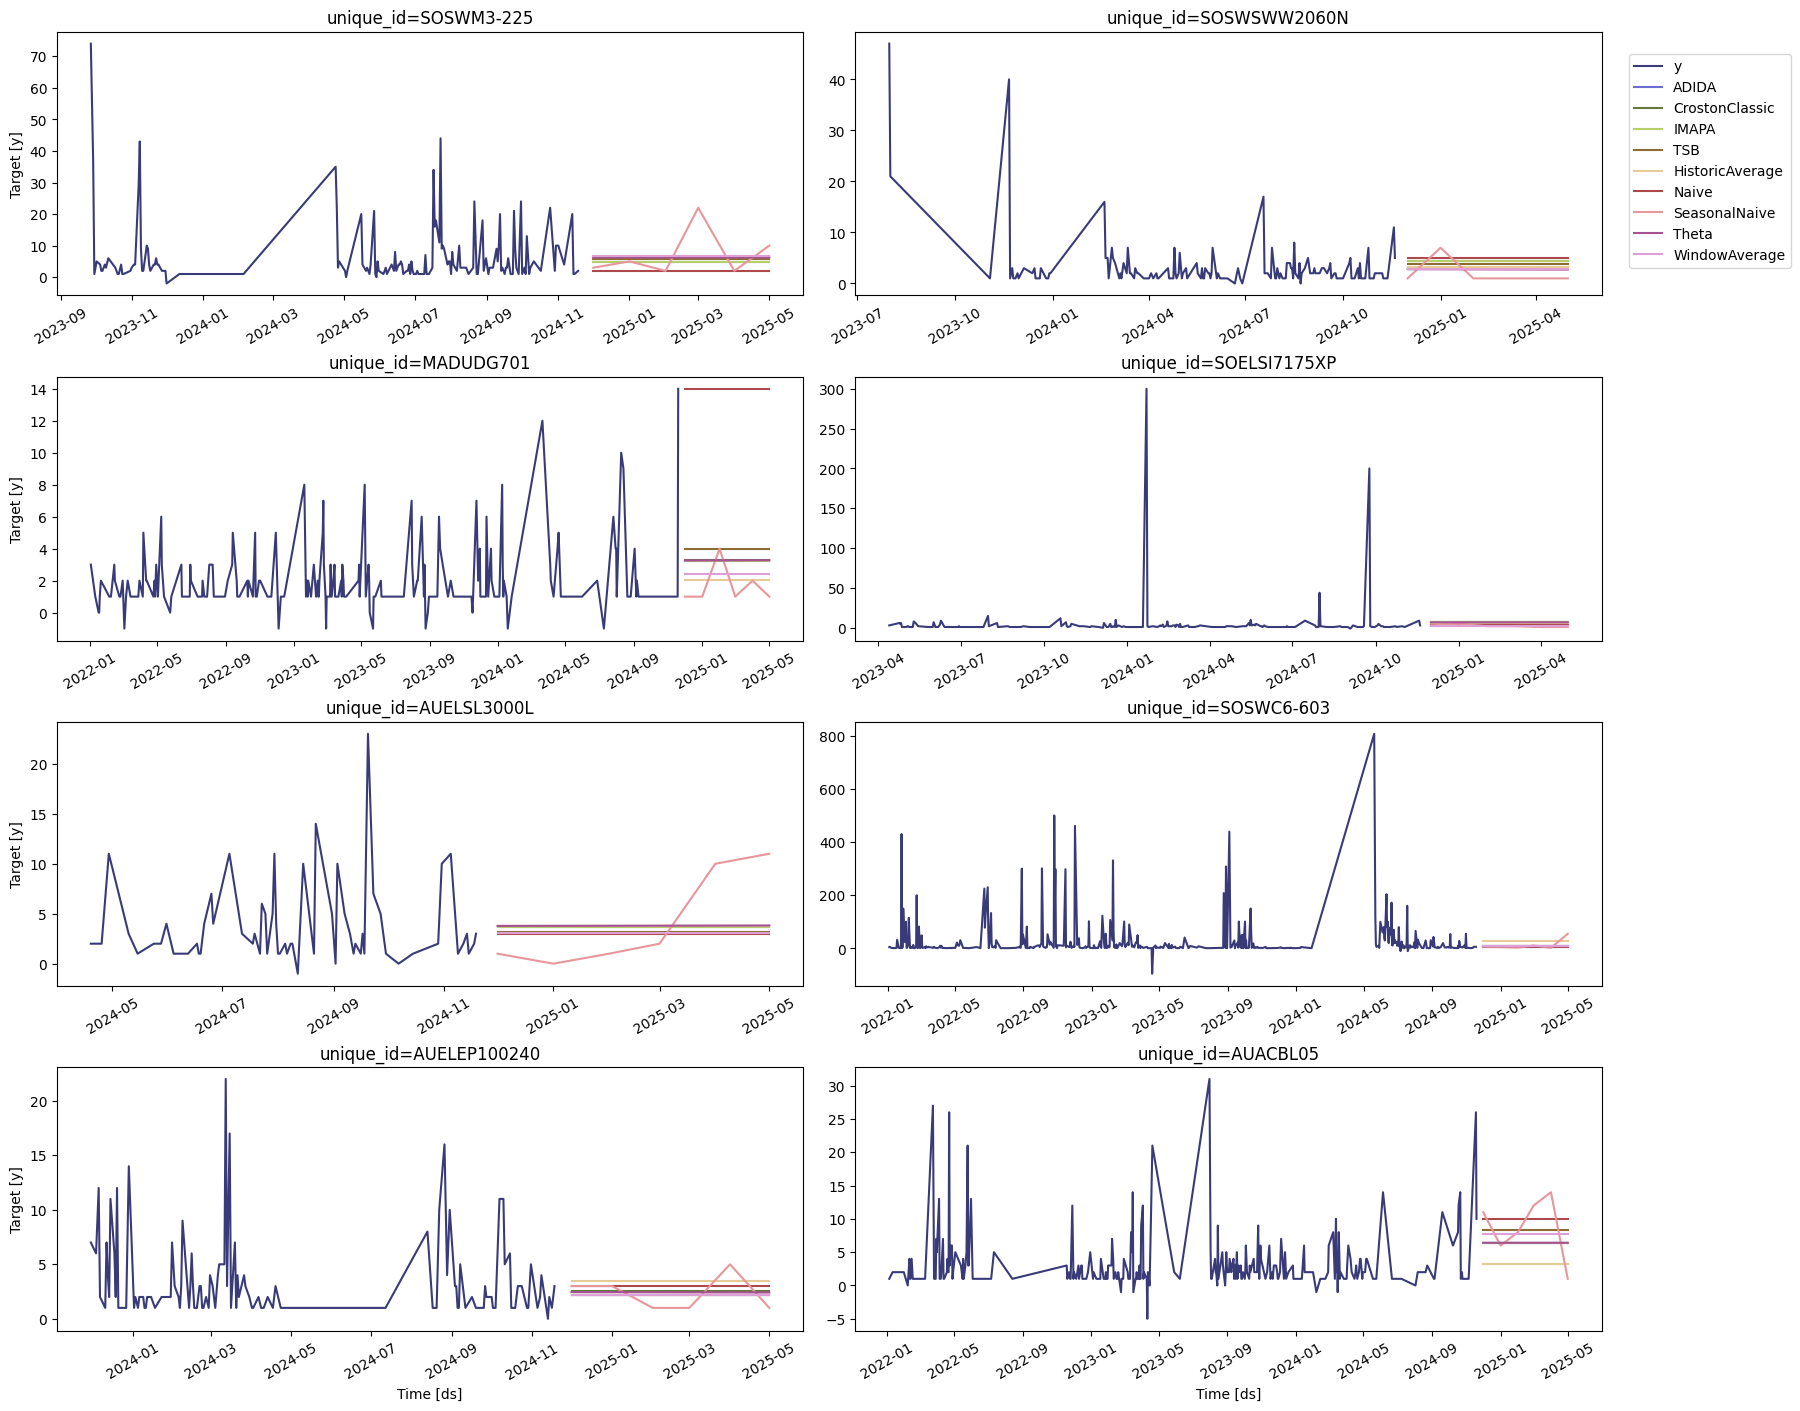

In [63]:
sf.plot(df_m,fcst_df)

In [131]:
def get_best_model_forecast(forecasts_df, evaluation_df):
    col_bm = evaluation_df['best_model'].values[0]
    df = forecasts_df[col_bm] # Wide to long 
    df = df.reset_index(drop=False)
    df.columns = ['unique_id', 'best_model']
    return df

prod_forecasts_df = get_best_model_forecast(forecasts_df = fcst_df, 
                                            evaluation_df = evaluation_df)
prod_forecasts_df

,unique_id,best_model
0,AUAC265,1.0
1,AUAC265,1.0
2,AUAC265,10.0
3,AUAC265,2.0
4,AUAC265,27.0
...,...,...
1771,SOSWT1-115,1.0
1772,SOSWT1-115,1.0
1773,SOSWT1-115,1.0
1774,SOSWT1-115,1.0
